In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

In [4]:
# Add the src directory to the Python path
sys.path.append(os.path.abspath('../src'))

from data_processing import load_brent_data, calculate_log_returns, load_event_data


In [6]:
## 1. Data Ingestion
print("\n--- Data Ingestion ---")
brent_data_path = '../data/raw/BrentOilPrices.csv'
events_data_path = '../data/raw/key_events.csv'

print(f"Loading Brent oil price data from: {brent_data_path}")
brent_df = load_brent_data(brent_data_path)

if brent_df is not None:
    print("\nBrent Data Loaded Successfully:")
    print(brent_df.head())
    print("\nBrent Data Info:")
    brent_df.info()
    print(f"\nDate Range: {brent_df['Date'].min().strftime('%Y-%m-%d')} to {brent_df['Date'].max().strftime('%Y-%m-%d')}")
else:
    print("Failed to load Brent oil price data.")

print(f"\nLoading Key Event data from: {events_data_path}")
events_df = load_event_data(events_data_path)

if events_df is not None:
    print("\nEvent Data Loaded Successfully:")
    print(events_df.head())
    print("\nEvent Data Info:")
    events_df.info()
else:
    print("Failed to load key event data.")


--- Data Ingestion ---
Loading Brent oil price data from: ../data/raw/BrentOilPrices.csv


C:\Users\du\Desktop\Git\brent-oil-price-prediction-using-time-series-data\src\data_processing.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])



Brent Data Loaded Successfully:
        Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63

Brent Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9011 non-null   datetime64[ns]
 1   Price   9011 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 140.9 KB

Date Range: 1987-05-20 to 2022-11-14

Loading Key Event data from: ../data/raw/key_events.csv

Event Data Loaded Successfully:
        Date       EventType  \
0 1990-08-02        Conflict   
1 1997-07-02  Economic Shock   
2 2001-09-11        Conflict   
3 2003-03-20        Conflict   
4 2008-09-15  Economic Shock   

                                    EventDescription  
0              Iraq invades Kuwait (Gulf War begins)  
1                      Asian Financial Crisis begins  


In [7]:
## 2. Exploratory Data Analysis (EDA)


--- Exploratory Data Analysis ---


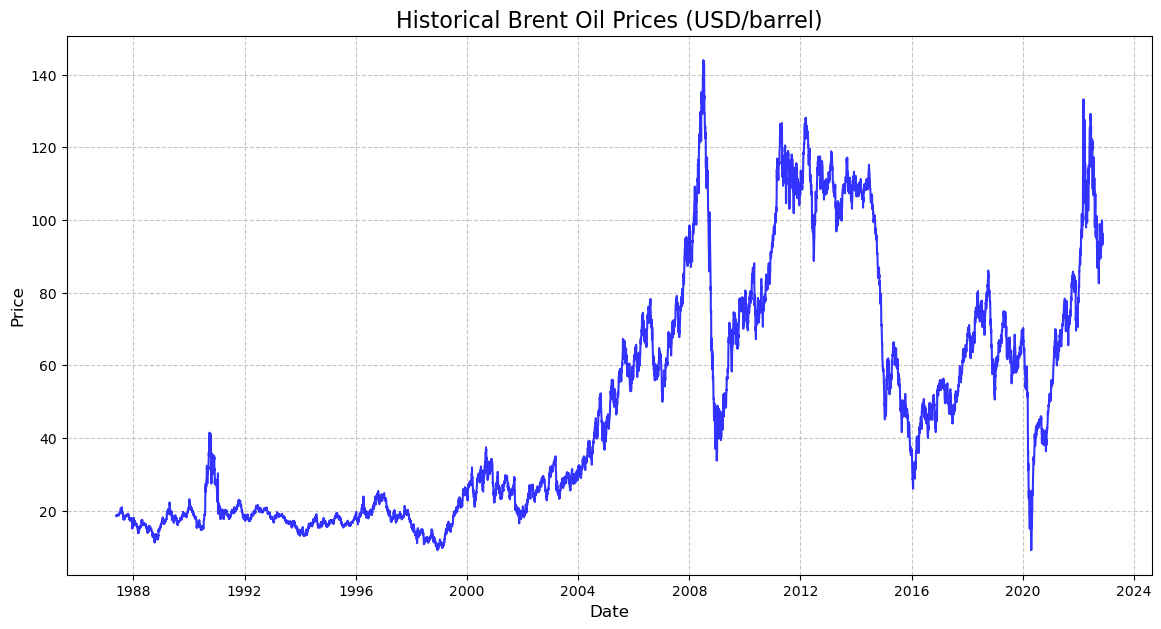


Observations from Raw Price Plot:
- Clear long-term trends (upward and downward cycles).
- Periods of high volatility and sudden drops/spikes .
- Non-stationarity: Mean and variance change over time.


In [8]:
print("\n--- Exploratory Data Analysis ---")

### Brent Oil Price Series
plt.figure(figsize=(14, 7))
plt.plot(brent_df['Date'], brent_df['Price'], color='blue', alpha=0.8)
plt.title('Historical Brent Oil Prices (USD/barrel)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("\nObservations from Raw Price Plot:")
print("- Clear long-term trends (upward and downward cycles).")
print("- Periods of high volatility and sudden drops/spikes .")
print("- Non-stationarity: Mean and variance change over time.")


Calculating daily log returns...

Brent Data with Log Returns Head:
        Date  Price  Log_Return
0 1987-05-21  18.45   -0.009709
1 1987-05-22  18.55    0.005405
2 1987-05-25  18.60    0.002692
3 1987-05-26  18.63    0.001612
4 1987-05-27  18.60   -0.001612

Log Return Statistics:
count    9010.000000
mean        0.000179
std         0.025532
min        -0.643699
25%        -0.011154
50%         0.000402
75%         0.012127
max         0.412023
Name: Log_Return, dtype: float64


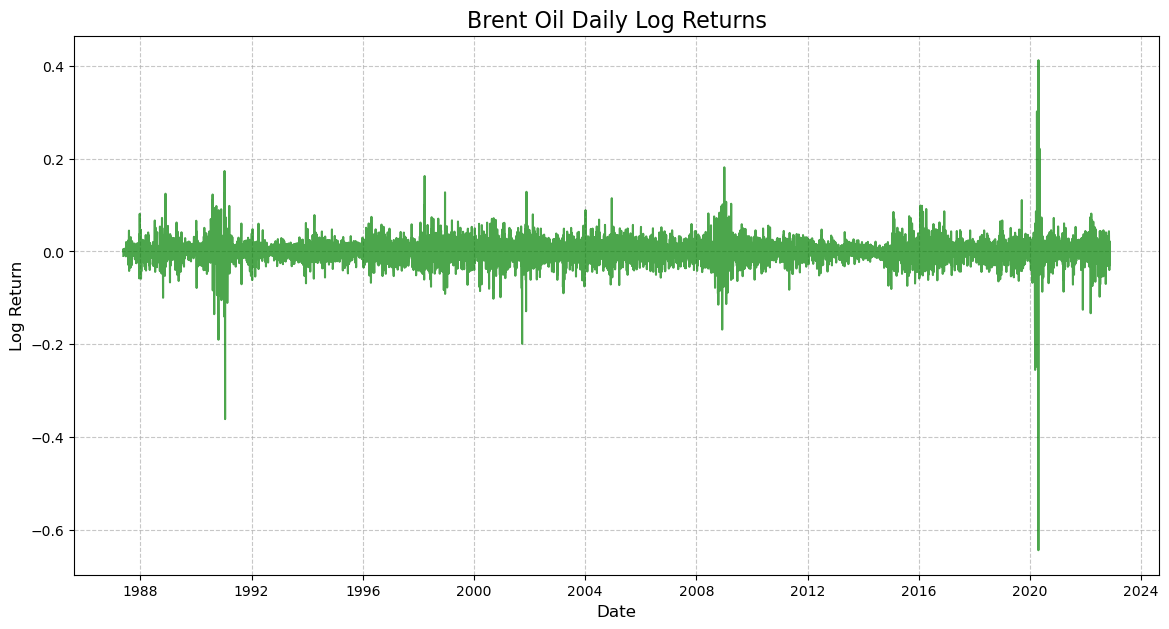


Observations from Log Returns Plot:
- Log returns appear more stationary than raw prices, centered around zero.
- Exhibits 'volatility clustering': periods of high volatility (large absolute returns) are followed by more high volatility, and vice-versa.
- Spikes in log returns indicate significant daily price movements, which often correspond to major events.


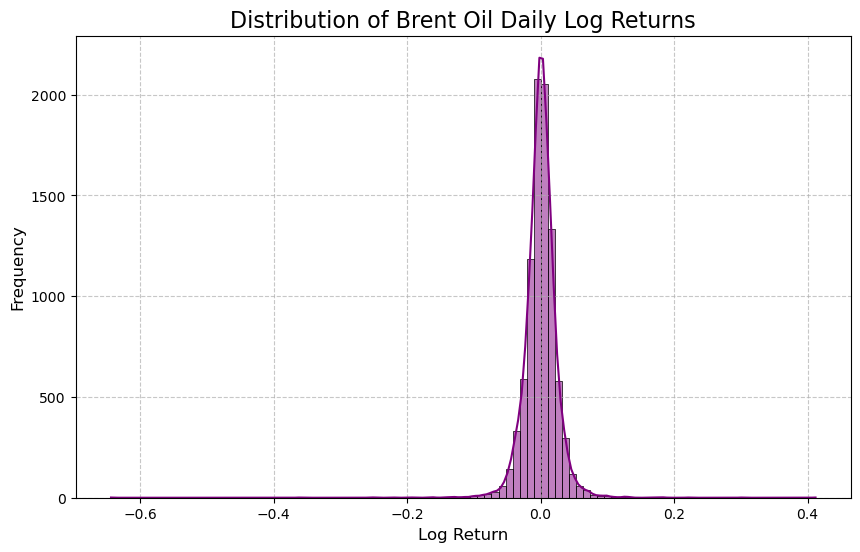


Observations from Log Returns Distribution:
- The distribution is typically leptokurtic (fat tails), meaning extreme events are more common than a normal distribution would suggest.
- This suggests that a Normal distribution might be used for the likelihood, but with recognition of the fat-tailed nature, or considering alternative distributions (e.g., Student's t-distribution) for more advanced modeling.

Processed Brent data with log returns saved to: ../data/processed/processed_brent_data.csv


In [18]:
### Calculate Log Returns
print("\nCalculating daily log returns...")
brent_df_with_returns = calculate_log_returns(brent_df.copy())

if brent_df_with_returns is not None:
    print("\nBrent Data with Log Returns Head:")
    print(brent_df_with_returns.head())
    print("\nLog Return Statistics:")
    print(brent_df_with_returns['Log_Return'].describe())

    plt.figure(figsize=(14, 7))
    plt.plot(brent_df_with_returns['Date'], brent_df_with_returns['Log_Return'], color='green', alpha=0.7)
    plt.title('Brent Oil Daily Log Returns', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Log Return', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    print("\nObservations from Log Returns Plot:")
    print("- Log returns appear more stationary than raw prices, centered around zero.")
    print("- Exhibits 'volatility clustering': periods of high volatility (large absolute returns) are followed by more high volatility, and vice-versa.")
    print("- Spikes in log returns indicate significant daily price movements, which often correspond to major events.")

    # Histogram of Log Returns
    plt.figure(figsize=(10, 6))
    sns.histplot(brent_df_with_returns['Log_Return'], bins=100, kde=True, color='purple')
    plt.title('Distribution of Brent Oil Daily Log Returns', fontsize=16)
    plt.xlabel('Log Return', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    print("\nObservations from Log Returns Distribution:")
    print("- The distribution is typically leptokurtic (fat tails), meaning extreme events are more common than a normal distribution would suggest.")
    print("- This suggests that a Normal distribution might be used for the likelihood, but with recognition of the fat-tailed nature, or considering alternative distributions (e.g., Student's t-distribution) for more advanced modeling.")

    # Save processed data for next steps
    processed_output_path = '../data/processed/processed_brent_data.csv'
    brent_df_with_returns.to_csv(processed_output_path, index=False)
    print(f"\nProcessed Brent data with log returns saved to: {processed_output_path}")

else:
    print("Skipping log returns analysis due to data loading issues.")